# 2.2

In [1]:
#今保存されているオブジェクトをまっさらにする。
rm(list=ls())

library(tidyverse)
data02 <- read_csv('./causality-main/data02.csv')

#分析の際にdataを指定する必要が無くなるらしい
#が、そんなことしたら個人的には混乱しそうなので、このコードは読まない。
# attach(data02)

-- Attaching packages --------------------------------------- tidyverse 1.3.1 --

v ggplot2 3.3.6     v purrr   0.3.4
v tibble  3.1.7     v dplyr   1.0.9
v tidyr   1.2.0     v stringr 1.4.0
v readr   2.1.2     v forcats 0.5.1

-- Conflicts ------------------------------------------ tidyverse_conflicts() --
x dplyr::filter() masks stats::filter()
x dplyr::lag()    masks stats::lag()

Rows: 20 Columns: 7
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (7): x1, y3, t1, y0, y1, y0t, y1t

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [9]:
summary(data02)

       x1              y3             t1            y0              y1       
 Min.   :58.00   Min.   :61.0   Min.   :0.0   Min.   :72.00   Min.   :61.00  
 1st Qu.:76.25   1st Qu.:75.0   1st Qu.:0.0   1st Qu.:75.00   1st Qu.:74.25  
 Median :83.50   Median :76.5   Median :0.0   Median :77.00   Median :75.50  
 Mean   :81.95   Mean   :76.6   Mean   :0.3   Mean   :77.79   Mean   :73.83  
 3rd Qu.:87.25   3rd Qu.:80.0   3rd Qu.:1.0   3rd Qu.:80.00   3rd Qu.:76.75  
 Max.   :96.00   Max.   :87.0   Max.   :1.0   Max.   :87.00   Max.   :80.00  
                                              NA's   :6       NA's   :14     
      y0t            y1t       
 Min.   :52.0   Min.   :61.00  
 1st Qu.:69.5   1st Qu.:79.25  
 Median :75.0   Median :84.50  
 Mean   :73.8   Mean   :83.85  
 3rd Qu.:78.5   3rd Qu.:89.00  
 Max.   :87.0   Max.   :97.00  
                               

## 補足学習

記述統計量/要約統計量を確認するなら、可視化もしておきたいところ

In [89]:
data02


x1,y3,t1,y0,y1,y0t,y1t
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
74,76,1,NA,76,68,76
82,75,0,75,NA,75,84
72,75,1,NA,75,65,75
96,84,0,84,NA,84,97
83,75,0,75,NA,75,84
72,74,1,NA,74,65,74
85,76,0,76,NA,76,87
87,77,0,77,NA,77,89
86,77,0,77,NA,77,87


In [24]:
str(data02)

spec_tbl_df [20 x 7] (S3: spec_tbl_df/tbl_df/tbl/data.frame)
 $ x1 : num [1:20] 74 82 72 96 83 72 85 87 86 77 ...
 $ y3 : num [1:20] 76 75 75 84 75 74 76 77 77 80 ...
 $ t1 : num [1:20] 1 0 1 0 0 1 0 0 0 1 ...
 $ y0 : num [1:20] NA 75 NA 84 75 NA 76 77 77 NA ...
 $ y1 : num [1:20] 76 NA 75 NA NA 74 NA NA NA 80 ...
 $ y0t: num [1:20] 68 75 65 84 75 65 76 77 77 70 ...
 $ y1t: num [1:20] 76 84 75 97 84 74 87 89 87 80 ...
 - attr(*, "spec")=
  .. cols(
  ..   x1 = col_double(),
  ..   y3 = col_double(),
  ..   t1 = col_double(),
  ..   y0 = col_double(),
  ..   y1 = col_double(),
  ..   y0t = col_double(),
  ..   y1t = col_double()
  .. )
 - attr(*, "problems")=<externalptr> 


入学時の全員の試験点数はどうなっていたのか

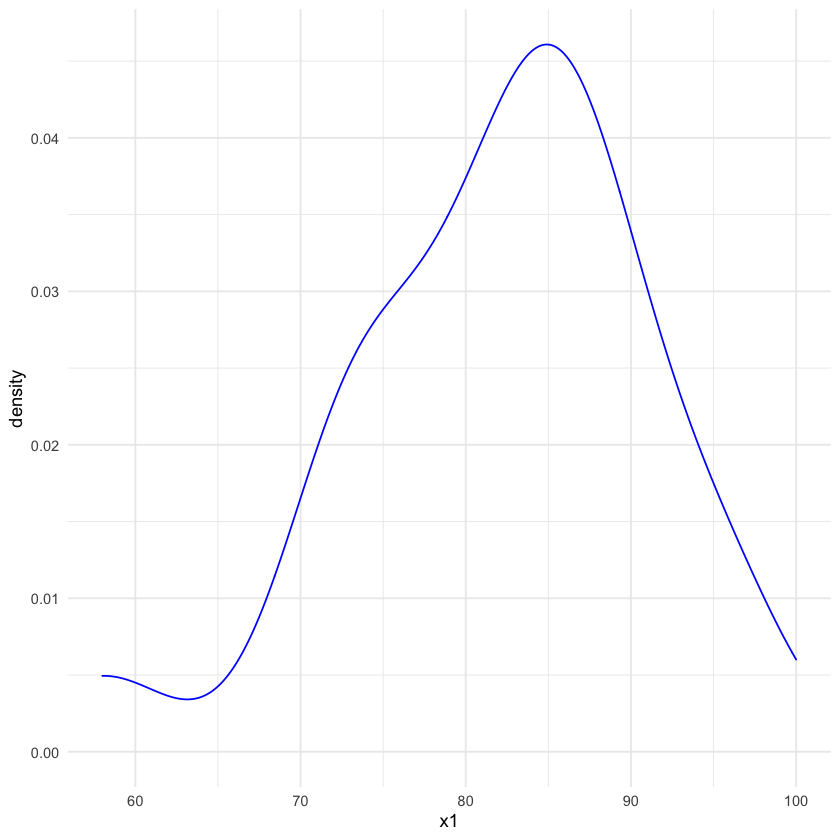

In [5]:
library(ggplot2)

x <- ggplot(data02, aes(x1)) +
geom_density(color="blue") + xlim(58, 100) +
theme_minimal() 
print(x)

näiveな群比較だとどうなっているのか

Warning message:
"Removed 6 rows containing non-finite values (stat_density)."
Warning message:
"Removed 14 rows containing non-finite values (stat_density)."


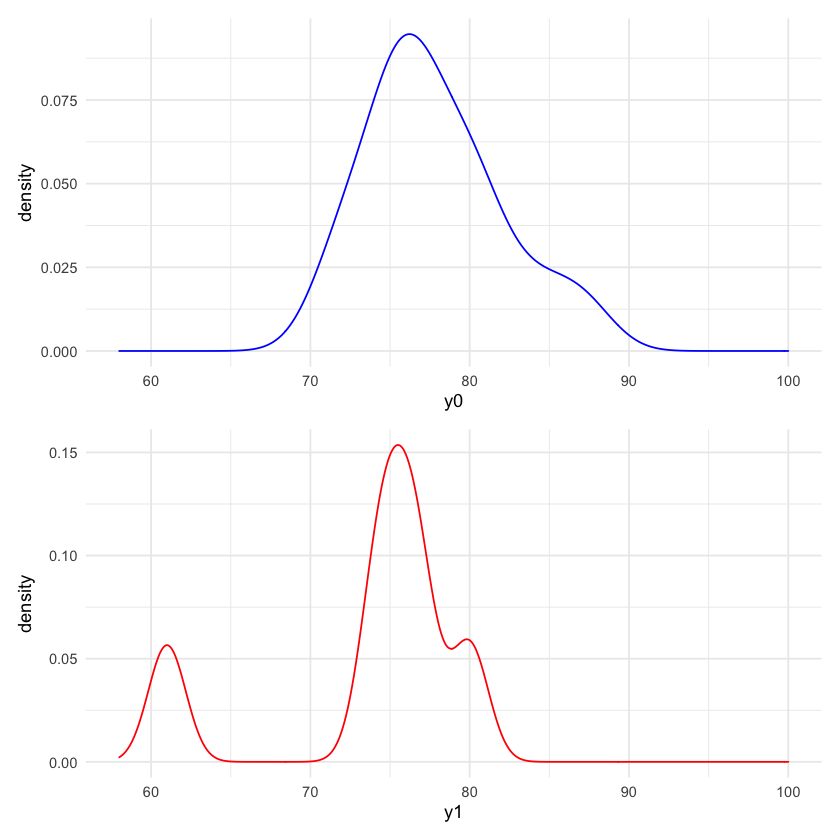

In [7]:
y0_obs <- data02 %>% 
ggplot(aes(y0)) +
geom_density(color='blue') +
xlim(58,100) +
theme_minimal()


y1_obs <- data02 %>%
ggplot(aes(y1)) +
geom_density(color='red') +
xlim(58,100) +
theme_minimal()

#二つの図を一つに重ねる
#install.packages("patchwork")
library(patchwork)
y0_obs + y1_obs + 
  plot_layout(guides = "collect", ncol = 1)

入学前スコアも合わせて

Warning message:
"Removed 6 rows containing non-finite values (stat_density)."
Warning message:
"Removed 14 rows containing non-finite values (stat_density)."


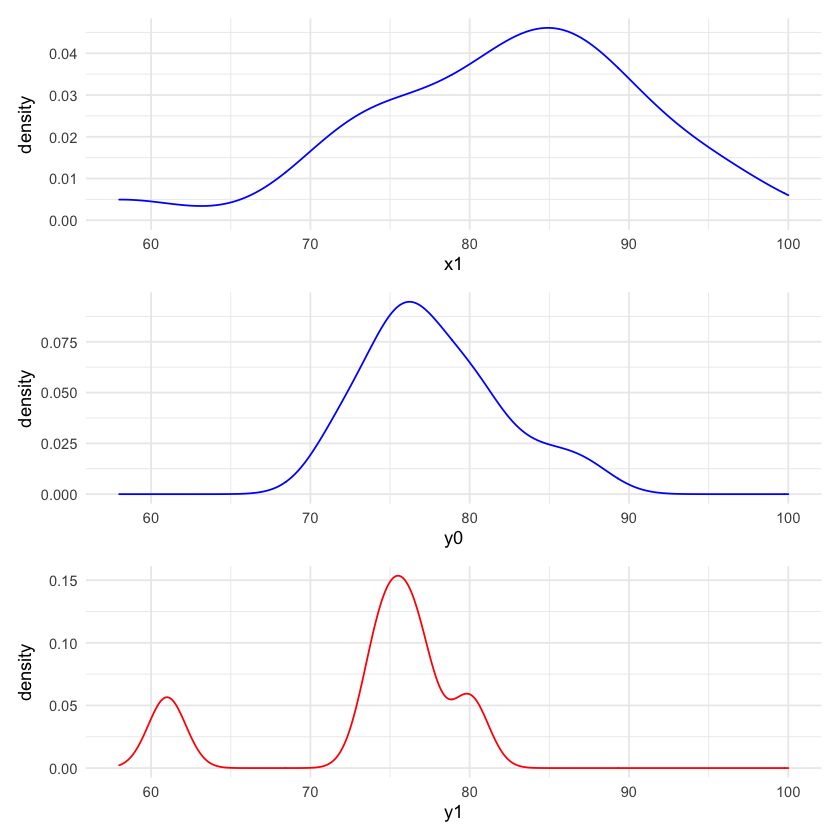

In [8]:
x + y0_obs + y1_obs +
    plot_layout(guides='collect', ncol=1)

本当は一つのグラフの中に複数の密度を載せたかったけれども、やり方が分からず...<br>
-->やり方判明：以下セル

Rows: 20 Columns: 7
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (7): x1, y3, t1, y0, y1, y0t, y1t

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.
Warning message:
"Removed 6 rows containing non-finite values (stat_density)."
Warning message:
"Removed 14 rows containing non-finite values (stat_density)."


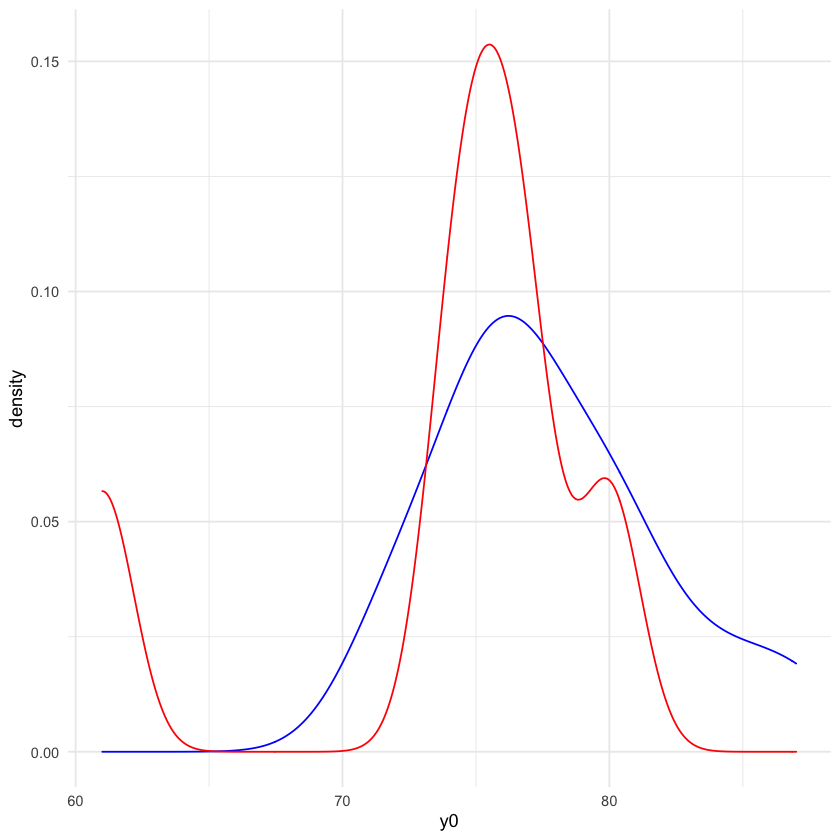

In [10]:
#一つの図に収める
data02 <- read_csv('./causality-main/data02.csv')

library("tidyverse")

g <- ggplot()
g <- g + geom_density(data = data02, mapping = aes(y0), color = "blue")
g <- g + geom_density(data = data02, mapping = aes(y1), color = "red")
g <- g + theme_minimal()
g

potential outcomes/潜在的結果を比較してみよう

Warning message:
"Removed 1 rows containing non-finite values (stat_density)."


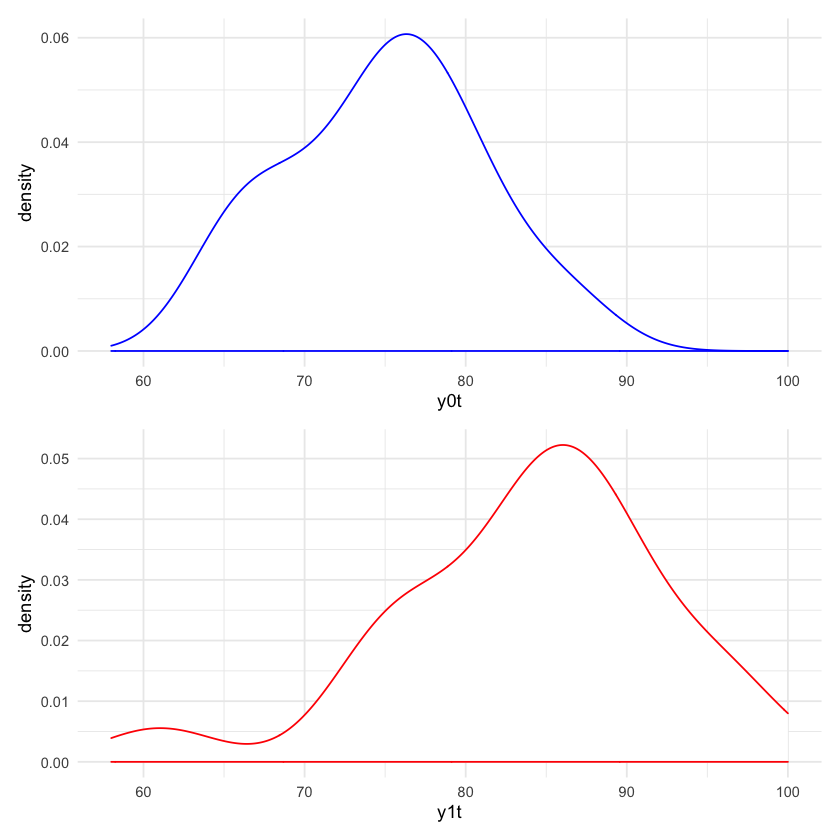

In [11]:
y0t <- data02 %>% ggplot(aes(y0t)) +
stat_density(color='blue', fill='white') +
xlim(58,100) +
theme_minimal()

y1t <- data02 %>% ggplot(aes(y1t)) +
stat_density(color='red', fill='white') +
xlim(58,100) +
theme_minimal()

y0t + y1t +
    plot_layout(guides='collect', ncol=1)

一つにまとめると...?

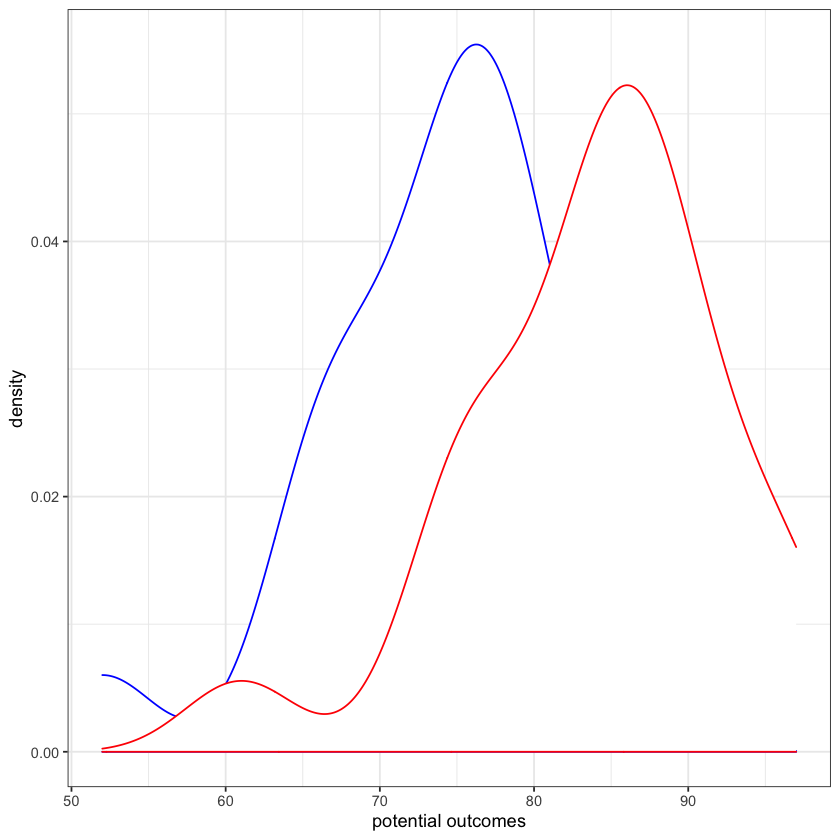

In [14]:
ice <- ggplot(data=data02) +
stat_density(mapping=aes(y0t), color='blue', fill='white') +
stat_density(mapping=aes(y1t), color='red', fill='white') +
theme_bw() +
labs(x='potential outcomes')
ice

# 2.3

In [98]:
data02$y1t - data02$y0t

[1]  8  9 10 13  9  9 11 12 10 10  9 10 10  9 12 12 10  9 10  9

In [99]:
data02$y3 - data02$x1

[1]   2  -7   3 -12  -8   2  -9 -10  -9   3  -8  -9   3   3 -10  -8  -8  -9  -8
[20]  -8

In [100]:
data02$y1 - data02$y0

[1] NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA NA

# 2.4

In [106]:
mean(data02$y1t) - mean(data02$y0t)

[1] 10.05

In [111]:
mean(data02$y3) - mean(data02$x1)

[1] -5.35

In [115]:
m1 <- mean(data02$y1, na.rm=TRUE)
m0 <- mean(data02$y0, na.rm=TRUE)
m1-m0

[1] -3.952381

一個でもNAが入っていると、普通には四則演算ができなくなってしまう

In [116]:
mean(data02$y1) - mean(data02$y0)

[1] NA

fancier code of these

In [117]:
data02 %>% select(y1t, y0t) %>% summarise(diff_mean = mean(y1t) - mean(y0t))
data02 %>% select(y3, x1) %>% summarise(mean(y3)-mean(x1))
data02 %>% select(y1, y0) %>% summarize(mean(y1, na.rm=TRUE)-mean(y0, na.rm=TRUE))

diff_mean
<dbl>
10.05


mean(y3) - mean(x1)
<dbl>
-5.35


"mean(y1, na.rm = TRUE) - mean(y0, na.rm = TRUE)"
<dbl>
-3.952381


教科書のコードよりこっちのコードの方が絶対可読性高い

In [9]:
data02 %>% with(mean(y1t)-mean(y0t))
data02 %>% with(mean(y3)-mean(x1))
data02 %>% with(mean(y1,na.rm=TRUE) - mean(y0, na.rm=TRUE))

[1] 10.05

[1] -5.35

[1] -3.952381

# 2.5

In [121]:
mt1 <- mean(data02$y1t[data02$t1==1])
mt0 <- mean(data02$y0t[data02$t1==1])
mt1-mt0

[1] 9.333333

fancier version

In [124]:
data02 %>% summarize(mean(y1t[t1==1])-mean(y0t[t1==1]))

mean(y1t[t1 == 1]) - mean(y0t[t1 == 1])
<dbl>
9.333333


もしくは以下のコード

In [10]:
with(data=data02, mean(y1t[t1==1])-mean(y0t[t1==1]))

[1] 9.333333

# 2.8

In [3]:
library(tidyverse)
data02 <- read_csv('./causality-main/data02.csv')

set.seed(1)
r0 <- runif(20,0,1)
r1 <- round(r0,0)
y2 <- NULL
y2[r1==1] <- data02$y1t[r1==1]
y2[r1==0] <- data02$y0t[r1==0]

Rows: 20 Columns: 7
-- Column specification --------------------------------------------------------
Delimiter: ","
dbl (7): x1, y3, t1, y0, y1, y0t, y1t

i Use `spec()` to retrieve the full column specification for this data.
i Specify the column types or set `show_col_types = FALSE` to quiet this message.


In [4]:
r1
y2

[1] 0 0 1 1 0 1 1 1 1 0 0 0 1 0 1 0 1 1 0 1

[1] 68 75 75 97 75 74 87 89 87 70 87 75 77 52 93 72 82 89 80 87

In [5]:
mr1 <- mean(y2[r1==1])
mr0 <- mean(y2[r1==0])
mr1 - mr0

[1] 12.51515

このくらいのコードならまとめて記述した方が個人的には見やすい気がする

In [14]:
mean(y2[r1==1]) - mean(y2[r1==0])

[1] 12.51515

# 2.10

In [15]:
t.test(y2[r1==1], y2[r1==0], var.equal=FALSE)


	Welch Two Sample t-test

data:  y2[r1 == 1] and y2[r1 == 0]
t = 3.2178, df = 14.878, p-value = 0.005801
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  4.219264 20.811039
sample estimates:
mean of x mean of y 
 85.18182  72.66667 
